In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(" sucess")


 sucess


In [2]:
# import the necessary nlibrary from tyhe scilit learn
from sklearn.model_selection  import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
print(" sucess")

 sucess


In [3]:
df=pd.read_csv("E:\\6th semmmm\\feature engineering datasets\\handlings the miossing datas\\titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
# find all the misisnfg values from the given datasets
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
# find the percentage of the missingbdatats 
(df.isnull().sum())/len(df)*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.shape  #v some of the values are missing in the ager and the fare 

(891, 4)

In [8]:
# bfind the percentage of the missing values 
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [9]:
# train test split datas 
X=df.drop(columns=['Survived'])
y=df['Survived']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [11]:
X_train.head()

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0


In [12]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

In [13]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [14]:
y_train.shape,y_test.shape

((712,), (179,))

In [15]:
# fin the how many null values in the traion datasets 
X_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [16]:
# find the percentage of the missing data in the train datasets
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [17]:
# we have to replace the missing data bwith the mean and the median --> tyhe vcariance should be the slightly difference
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [18]:
print(" mean age ",mean_age)
print(" median age ",median_age)

print(" mean fare ",mean_fare)
print(" median faree ",median_fare)

 mean age  29.78590425531915
 median age  28.75
 mean fare  32.617596893491076
 median faree  14.4583


# fill the datas with th eusing of the pandas fillna function

In [19]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

# fill with the fare data
X_train['fare_median']=X_train['Fare'].fillna(median_fare)
X_train['fare_mean']=X_train['Fare'].fillna(mean_fare)



In [20]:
# now see the sample data 
X_train.sample(10) #we fil the data 

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
759,33.0,86.5000,0,33.00,33.000000,86.5000,86.500000
214,NaN,7.7500,1,28.75,29.785904,7.7500,7.750000
211,35.0,NaN,0,35.00,35.000000,14.4583,32.617597
399,28.0,12.6500,0,28.00,28.000000,12.6500,12.650000
604,35.0,26.5500,0,35.00,35.000000,26.5500,26.550000
324,NaN,69.5500,10,28.75,29.785904,69.5500,69.550000
810,26.0,7.8875,0,26.00,26.000000,7.8875,7.887500
390,36.0,120.0000,3,36.00,36.000000,120.0000,120.000000
66,29.0,10.5000,0,29.00,29.000000,10.5000,10.500000
73,26.0,14.4542,1,26.00,26.000000,14.4542,14.454200


In [21]:
# now see the differencwe ion the varience
print(" original age varience ",X_train['Age'].var())
print(" mean age varience ",X_train['Age_mean'].var())
print(" median  age varience ",X_train['Age_median'].var())

print('***********************************')
print(" original fare  varience ",X_train['Fare'].var())
print(" mean fare  varience ",X_train['fare_mean'].var())
print(" median  fare varience ",X_train['fare_median'].var())

# we have to fill na with the closest to the original datas 

 original age varience  204.3495133904614
 mean age varience  161.81262452718673
 median  age varience  161.9895663346054
***********************************
 original fare  varience  2448.197913706318
 mean fare  varience  2324.2385256705547
 median  fare varience  2340.0910219753637


# show the different distributions in the density plots

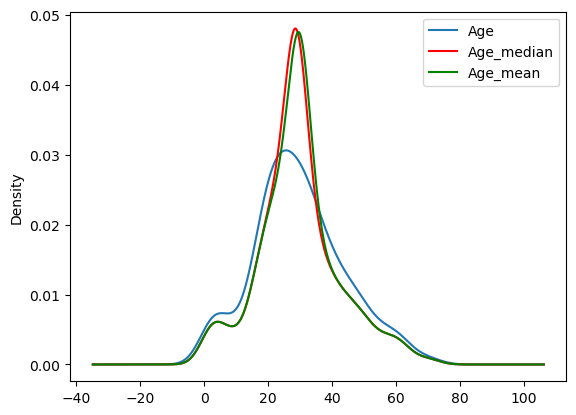

In [22]:
# distributions  of the columns age 
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distributions
X_train['Age'].plot(kind='kde',ax=ax)

# variable imputes with the median
X_train['Age_median'].plot(kind='kde',ax=ax,color='red')

# variable imputes with the mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

# add the legends 
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')



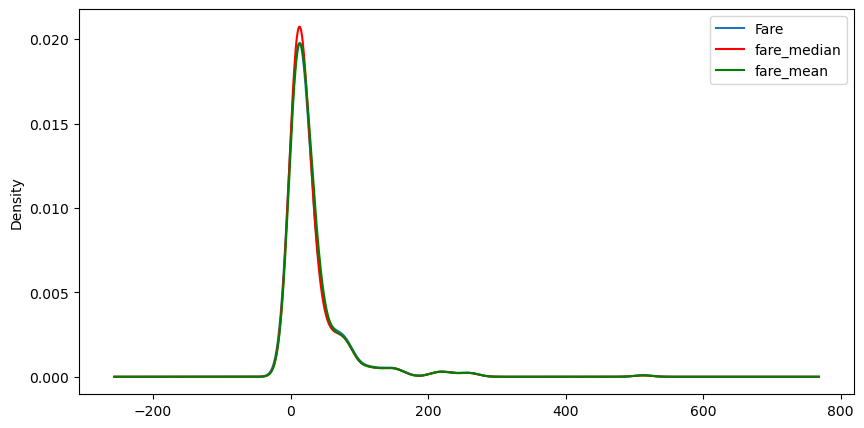

In [23]:
# distributions  of the columns fare 
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)

# original variable distributions
X_train['Fare'].plot(kind='kde',ax=ax)

# variable imputes with the median
X_train['fare_median'].plot(kind='kde',ax=ax,color='red')

# variable imputes with the mean
X_train['fare_mean'].plot(kind='kde',ax=ax,color='green')

# add the legends 
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# the  varience of median valueno f the fare is colse to the varience pof the original
# so we have to fill the na values for the medin in the fare 


<AxesSubplot:>

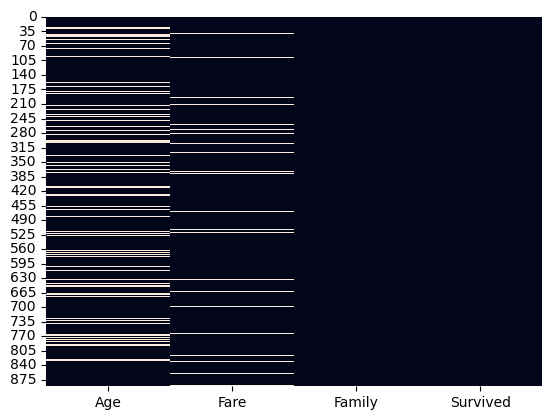

In [24]:
# see the data are random missing or not in the heatmap
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False) # this shows the data are missing at random 

In [25]:
# we have to see the change in the covarience withb the other data
X_train.cov()
# the covarience values should not strickly increased 
# if there is drastic change we have to solcve with the another techniques 

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


# see the age in the box plots

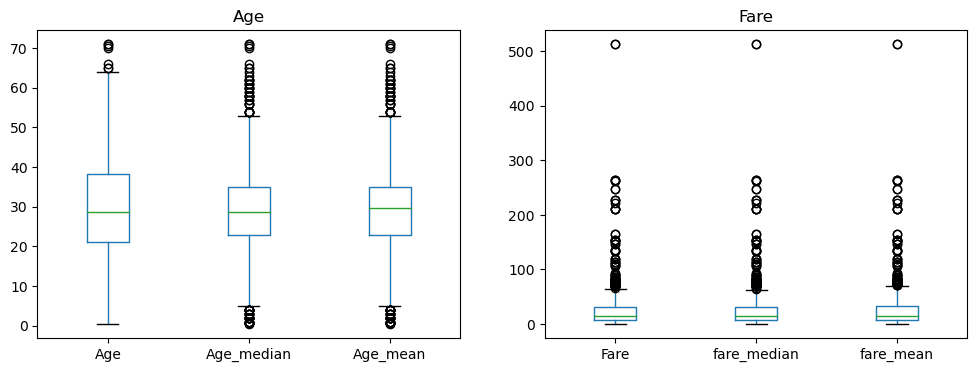

In [26]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))
ax1.set_title("Age")
X_train[['Age','Age_median','Age_mean']].boxplot(grid=False,ax=ax1)
# for the fare columns 
ax2.set_title("Fare")
X_train[['Fare','fare_median','fare_mean']].boxplot(grid=False,ax=ax2)
plt.show()

# conclusios -> in the age there is drastic difference in the covarience , and impact of the outliers so we have to
# fill withbthe differnet techniques 
# in fare columns there is no difference so we can fill with the median , mean ,

# fill the  missing data with the sklearn 

In [27]:
# train test split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
X.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

In [29]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [30]:
# make the simple imputer classes 
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [31]:
X_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [32]:
# column transformers 
trf=ColumnTransformer([
    ('imput_mis1',imputer1,['Age']),
    ('imput_mis2',imputer2,['Fare'])
    
],remainder='passthrough')
print("column transfer sucessfully")

column transfer sucessfully


In [33]:
trf.fit(X_train)  # this will fill the missing datas in our columns 

ColumnTransformer(remainder='passthrough',
                  transformers=[('imput_mis1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imput_mis2', SimpleImputer(), ['Fare'])])

In [34]:
# to see the some statissitcs data of the columns
trf.named_transformers_['imput_mis1'].statistics_  # median value of the columns age 

array([28.75])

In [35]:
X_train['Age'].median()

28.75

In [36]:
# for the fare values b
trf.named_transformers_['imput_mis2'].statistics_   # mean value of the fare columns 

array([32.61759689])

In [37]:
X_train['Fare'].mean()

32.617596893491076

In [38]:
train_cols=X_train.columns
test_cols=X_test.columns
test_cols

Index(['Age', 'Fare', 'Family'], dtype='object')

In [39]:
# change the numpy  aray into the dataframes 
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)
print(" sucerssfully")

 sucerssfully


In [40]:
print(type(X_train))
len(X_train)

<class 'numpy.ndarray'>


712

In [41]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [42]:
X_train=pd.DataFrame(X_train,columns=train_cols)
X_test=pd.DataFrame(X_test,columns=test_cols)
print(" converted sucessfully")

 converted sucessfully


In [43]:
X_train.head()

,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0


In [44]:
# see the null values in the age , age the fare columns 
X_train.isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64

In [45]:
X_train.sample(20)

,Age,Fare,Family
33,41.00,32.617597,2.0
207,34.00,13.000000,0.0
569,38.00,90.000000,1.0
495,28.75,7.895800,0.0
9,28.75,8.050000,0.0
31,50.00,28.712500,0.0
584,22.00,7.250000,1.0
307,51.00,77.958300,1.0
379,28.75,0.000000,0.0
208,16.00,86.500000,0.0


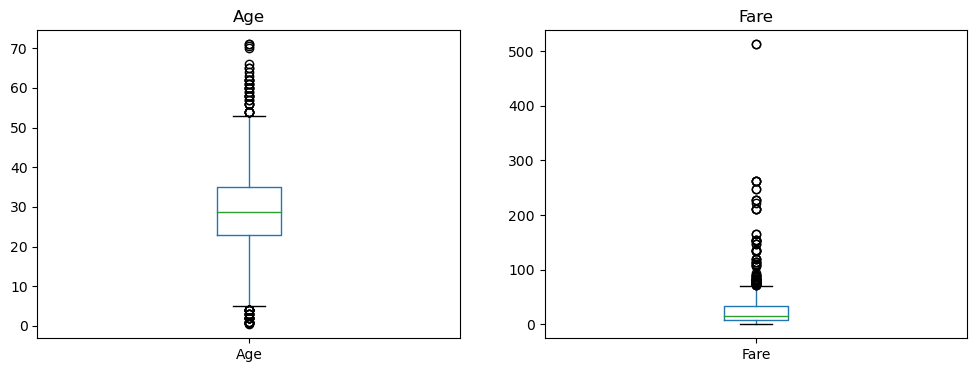

In [46]:
# box pots 
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))
ax1.set_title("Age")
X_train[['Age']].boxplot(grid=False,ax=ax1)
# for the fare columns 
ax2.set_title("Fare")
X_train[['Fare']].boxplot(grid=False,ax=ax2)
plt.show()
